In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_recall_curve,auc,average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import multilabel_confusion_matrix
%matplotlib inline


## Schools eqao scores
* Data Source : https://www.ontario.ca/data/school-information-and-student-demographics
* File type: xlsx

In [167]:
# Read excel file

path="../Data/Schools_EQAO/School_data_2017_2018.xlsx"
schools_eqao=pd.read_excel(path)
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Province,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Change in Grade 3 Writing Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,NaN,NaN,550 Northern Ave,Sault Ste. Marie,Sault Ste Marie,Ontario,P6B4J4,705-945-7194,705-945-7173,http://www.adsb.on.ca,http://www.adsb.on.ca,202.0,46.53477,-84.30772,NaN,100,NaN,NaN,19.8,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/D,NaN,N/R,NaN,N/R,NaN,22.7,20.5,2019-05-10
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,250 Mark St,Sault Ste. Marie,Sault Ste Marie,Ontario,P6A3M7,705-945-7106,705-945-7221,http://www.adsb.on.ca/sites/schools/amc/defaul...,http://www.adsb.on.ca,182.0,46.50593,-84.28732,SP,100,SP,SP,14.8,NaN,79%,-7.0,50%,-29.0,64%,-7.0,86%,-14.0,43%,-46.0,36%,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11,56.3,2019-05-10
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,NaN,NaN,2 Henderson Lane 2,Bruce Mines,Bruce Mines,Ontario,P0R1C0,705-785-3483,705-785-3220,http://www.adsb.on.ca/sites/schools/art/defaul...,http://www.adsb.on.ca,64.0,46.30183,-83.78020,NaN,100,NaN,NaN,SP,NaN,80%,40.0,73%,20.0,53%,6.0,N/D,NaN,N/D,NaN,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-05-10
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,24 Paradise Ave,Sault Ste. Marie,Sault Ste Marie,Ontario,P6B5K2,705-945-7108,705-945-7205,http://www.adsb.on.ca/sites/schools/brm/defaul...,http://www.adsb.on.ca,177.0,46.52455,-84.29804,SP,100,SP,SP,17.5,NaN,62%,-17.0,31%,-48.0,38%,-41.0,50%,-7.0,42%,-29.0,25%,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32,31.4,2019-05-10
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,19 Hanes Ave,Blind River,Blind River,Ontario,P0R1B0,705-356-7752,

In [168]:
#Describe data
schools_eqao.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrolment,4819.0,418.172235,304.687226,10.00000,216.000000,346.00000,534.00000,2080.00000
Latitude,4887.0,44.232776,1.436708,41.80695,43.481690,43.77387,44.50844,51.46627
Longitude,4887.0,-79.711157,2.593027,-94.56370,-80.308555,-79.56298,-79.21214,-74.47102
Change in Grade 3 Reading Achievement Over Three Years,3084.0,2.948119,13.878343,-56.00000,-5.000000,3.00000,11.00000,65.00000
Change in Grade 3 Writing Achievement Over Three Years,3086.0,-2.086520,16.039496,-74.00000,-11.000000,-3.00000,7.00000,92.00000
Change in Grade 3 Mathematics Achievement Over Three Years,3134.0,-1.945437,16.200346,-77.00000,-12.000000,-2.00000,7.75000,85.00000
Change in Grade 6 Reading Achievement Over Three Years,2917.0,1.146726,11.355510,-42.00000,-5.000000,1.00000,7.00000,57.00000
Change in Grade 6 Writing Achievement Over Three Years,2917.0,-0.562564,13.019662,-68.00000,-8.000000,0.00000,7.00000,64.00000
Change in Grade 6 Mathematics Achievement Over Three Years,2915.0,-1.553002,16.380268,-69.00000,-11.000000,-1.00000,8.00000,65.00000
Change in Grade 9 Academic Mathematics Achievement Over Three Years,699.0,0.964235,10.739298,-50.00000,-4.000000,1.00000,6.00000,64.00000


In [169]:
# Change dtype of all columns containing 'percentage' to float, remove % sign and convert to .2f, replace 'nan',''NA',
# 'SP' and 'N/D' by 'NaN'. 

for column in schools_eqao.columns:
    if 'Percentage' in column:
        schools_eqao[column].replace(to_replace=['SP','N/D','N/R','NA'],value=np.nan,inplace=True)
        schools_eqao[column]= schools_eqao[column].str.replace(r'%',r'').astype('float')
        
# schools_eqao.fillna(0, inplace=True)

In [170]:
schools_eqao.dtypes

Board Number                                                                                        object
Board Name                                                                                          object
Board Type                                                                                          object
School Number                                                                                       object
School Name                                                                                         object
School Type                                                                                         object
School Special Condition Code                                                                       object
School Level                                                                                        object
School Language                                                                                     object
Grade Range                          

In [171]:
#Drop columns with blank lat and long

# Get names of indexes for which column Latitude is null
indexNames = schools_eqao[ schools_eqao['Latitude'].isnull()].index
 
# Delete these row indexes from dataFrame
schools_eqao.drop(indexNames , inplace=True)

schools_eqao.reset_index(drop=True)

schools_eqao.count()

Board Number                                                                                4887
Board Name                                                                                  4887
Board Type                                                                                  4887
School Number                                                                               4887
School Name                                                                                 4887
School Type                                                                                 4887
School Special Condition Code                                                               4887
School Level                                                                                4887
School Language                                                                             4887
Grade Range                                                                                 4887
Building Suite                

In [172]:
#Insert new column with avg. EQAO scores 
schools_eqao['Avg_EQAO']=\
schools_eqao[['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
              'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'
             ]].mean(axis=1)


In [173]:
#Insert new column with avg. change in EQAO scores 
schools_eqao['Avg_change_EQAO']=\
schools_eqao[['Change in Grade 3 Reading Achievement Over Three Years',\
              'Change in Grade 3 Writing Achievement Over Three Years',\
              'Change in Grade 3 Mathematics Achievement Over Three Years',\
              'Change in Grade 6 Reading Achievement Over Three Years',\
              'Change in Grade 6 Writing Achievement Over Three Years',\
              'Change in Grade 6 Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
              'Change in Grade 10 OSSLT Literacy Achievement Over Three Years'
             ]].mean(axis=1)

In [174]:
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Province,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Change in Grade 3 Writing Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date,Avg_EQAO,Avg_change_EQAO
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,NaN,NaN,550 Northern Ave,Sault Ste. Marie,Sault Ste Marie,Ontario,P6B4J4,705-945-7194,705-945-7173,http://www.adsb.on.ca,http://www.adsb.on.ca,202.0,46.53477,-84.30772,NaN,100.0,NaN,NaN,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.7,20.5,2019-05-10,NaN,NaN
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,250 Mark St,Sault Ste. Marie,Sault Ste Marie,Ontario,P6A3M7,705-945-7106,705-945-7221,http://www.adsb.on.ca/sites/schools/amc/defaul...,http://www.adsb.on.ca,182.0,46.50593,-84.28732,NaN,100.0,NaN,NaN,14.8,NaN,79.0,-7.0,50.0,-29.0,64.0,-7.0,86.0,-14.0,43.0,-46.0,36.0,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,56.3,2019-05-10,59.666667,-23.166667
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,NaN,NaN,2 Henderson Lane 2,Bruce Mines,Bruce Mines,Ontario,P0R1C0,705-785-3483,705-785-3220,http://www.adsb.on.ca/sites/schools/art/defaul...,http://www.adsb.on.ca,64.0,46.30183,-83.78020,NaN,100.0,NaN,NaN,NaN,NaN,80.0,40.0,73.0,20.0,53.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-05-10,68.666667,22.000000
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,24 Paradise Ave,Sault Ste. Marie,Sault Ste Marie,Ontario,P6B5K2,705-945-7108,705-945-7205,http://www.adsb.on.ca/sites/schools/brm/defaul...,http://www.adsb.on.ca,177.0,46.52455,-84.29804,NaN,100.0,NaN,NaN,17.5,NaN,62.0,-17.0,31.0,-48.0,38.0,-41.0,50.0,-7.0,42.0,-29.0,25.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,31.4,2019-05-10,41.333333,-24.333333
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Pub

In [175]:
#drop values with NaN Avg EQAO
schools_eqao.dropna(subset=['Avg_EQAO'])

#Delete Columns only when all values are Null
schools_eqao = schools_eqao.dropna(axis=1,how='all')

# # Replace NaN with avg value
schools_eqao.fillna(schools_eqao.mean(), inplace=True)
# df_ml.fillna(0, inplace=True)

# Delete Constant Columns
schools_eqao = schools_eqao.loc[:,schools_eqao.apply(pd.Series.nunique) != 1]

# Delete columns with 0 EQAO score
schools_eqao= schools_eqao[schools_eqao['Avg_EQAO'] != 0]

# Delete columns with 0 enrolment
schools_eqao= schools_eqao[schools_eqao['Enrolment'] != 0]


schools_eqao.count()

Board Number                                                                                4886
Board Name                                                                                  4886
Board Type                                                                                  4886
School Number                                                                               4886
School Name                                                                                 4886
School Type                                                                                 4886
School Special Condition Code                                                               4886
School Level                                                                                4886
School Language                                                                             4886
Grade Range                                                                                 4886
Building Suite                

In [176]:
# schools_eqao.plot.scatter(x='Percentage of Children Who Live in Low-Income Households',y='Avg_EQAO')

In [177]:
# sns.regplot(schools_eqao['Percentage of Children Who Live in Low-Income Households'],schools_eqao['Avg_EQAO'])

In [178]:
# schools_eqao['Percentage of Children Who Live in Low-Income Households'].corr(schools_eqao['Avg_EQAO'])

In [179]:
# Number of schools by board
# schools_eqao.groupby(['Board Name']).count()['School Name'].plot.bar(figsize=(20,5))

In [180]:
#Top 3 boards
# schools_eqao.groupby(['Board Name']).count()['School Name'].sort_values(ascending=False)[0:3]

## Mapping nearest census DAs

In [181]:
#Read DA Excel file

path="../Data/DA centre lat long/DA_centre_lat_long_Ontario_cleaned.xlsx"

da_df=pd.read_excel(path)
da_df.head()

,DA_id,DA_lat,DA_long
0,35510089,45.734932,-82.328953
1,35520104,46.258873,-81.796169
2,35520114,46.237923,-81.800407
3,35510072,45.974472,-81.965987
4,35510070,45.927388,-81.894390


In [182]:
#use scipy.spatial.KDTree.query to find nearest neighbor
from scipy import spatial
tree = spatial.KDTree(list(zip(da_df['DA_lat'], da_df['DA_long'])))

tree.data

array([[ 45.734932, -82.328953],
       [ 46.258873, -81.796169],
       [ 46.237923, -81.800407],
       ...,
       [ 43.646285, -79.732508],
       [ 43.717396, -79.568439],
       [ 43.599487, -79.596617]])

In [183]:
school_loc = list(zip(schools_eqao['Latitude'],schools_eqao['Longitude']))

n=len(school_loc)

In [184]:
# da_df.loc[8830]['DA_id']

Nearest4DA=[]

for i in range (0,n) :
    Nearest4DA.append(list(da_df.loc[tree.query(school_loc[i],k=4, eps=0, p=2)[1]]['DA_id']))
    
schools_eqao['Nearest4DA']=Nearest4DA

In [185]:
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Change in Grade 3 Writing Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Avg_EQAO,Avg_change_EQAO,Nearest4DA
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,NaN,NaN,550 Northern Ave,Sault Ste. Marie,Sault Ste Marie,P6B4J4,705-945-7194,705-945-7173,http://www.adsb.on.ca,http://www.adsb.on.ca,202.0,46.53477,-84.30772,33.608842,100.0,8.734001,8.702096,19.800000,7.670225,74.598562,2.948119,71.223188,-2.08652,60.486279,-1.945437,81.549283,1.146726,78.285714,-0.562564,48.728322,-1.553002,81.812414,0.964235,45.8,-0.057576,76.427041,-2.378082,22.7,20.5,68.867572,-0.457434,"[35570382, 35570097, 35570099, 35570096]"
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,250 Mark St,Sault Ste. Marie,Sault Ste Marie,P6A3M7,705-945-7106,705-945-7221,http://www.adsb.on.ca/sites/schools/amc/defaul...,http://www.adsb.on.ca,182.0,46.50593,-84.28732,33.608842,100.0,8.734001,8.702096,14.800000,7.670225,79.000000,-7.000000,50.000000,-29.00000,64.000000,-7.000000,86.000000,-14.000000,43.000000,-46.000000,36.000000,-36.000000,81.812414,0.964235,45.8,-0.057576,76.427041,-2.378082,11.0,56.3,59.666667,-23.166667,"[35570112, 35570111, 35570065, 35570068]"
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,NaN,NaN,2 Henderson Lane 2,Bruce Mines,Bruce Mines,P0R1C0,705-785-3483,705-785-3220,http://www.adsb.on.ca/sites/schools/art/defaul...,http://www.adsb.on.ca,64.0,46.30183,-83.78020,33.608842,100.0,8.734001,8.702096,18.996518,7.670225,80.000000,40.000000,73.000000,20.00000,53.000000,6.000000,81.549283,1.146726,78.285714,-0.562564,48.728322,-1.553002,81.812414,0.964235,45.8,-0.057576,76.427041,-2.378082,34.3,37.2,68.666667,22.000000,"[35570324, 35570323, 35570319, 35570317]"
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Element

## Mapping Census Data

In [186]:
# Read census file

path="../Data/Census/Census_2016_ON_v2.xlsx"

census_df=pd.read_excel(path)
census_df.head()


,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,Dwelling_Otherattached,MaritalStatus_Married,MaritalStatus_NotMarried,KnowledgeofOfficialLanguage_EnglishOnly,KnowledgeofOfficialLanguage_FrenchOnly,KnowledgeofOfficialLanguage_both,KnowledgeofOfficialLanguage_none,MedianIncome,Canadian citizens,NotCanadianCitizens,Immigration_Non-immigrants,Immigration_Immigrants,Immigration_Immigrants _Before1981,Immigration _Immigrants_1981to1990,Immigration_Immigrants_1991to2000,Immigration_Immigrants_2001to2010,Immigration_ Immigrants_2011to2016,Immigration_Non-permanent residents,Immigration_SelectedPlacesBirth_Americas,Immigration_SelectedPlacesBirth_Europe,Immigration_SelectedPlacesBirth_Africa,Immigration_SelectedPlacesBirth_Asia,Immigration_SelectedPlacesBirth_Oceania_Other,Housing_Owner,Housing_Renter,Housing_BandHousing,EthnicOrigin_Total,EthnicOrigin_NorthAmericanAboriginal,EthnicOrigin_OtherNorthAmerican,EthnicOrigin_European,EthnicOrigin_Caribbean,EthnicOrigin_LatinCentralSouthAmerican,EthniOrigin_African,EthnicOrigin_Asian,EthnicOrigin_Oceania,Education_No certificateDiplomaDegree,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
0,3501,113429.0,44.1,15.7,62.6,21.8,2.3,47830.0,33550.0,1195.0,12640.0,57700.0,37970.0,67450.0,1370.0,42760.0,205.0,59526.0,109050.0,1760.0,103310.0,7170.0,3850.0,865.0,975.0,1080.0,400.0,330.0,1150.0,4045.0,235.0,1695.0,45.0,33880.0,13945.0,0.0,110815.0,8035.0,55935.0,74500.0,515.0,325.0,680.0,3420.0,115.0,20885.0,29220.0,42965.0,8285.0,22700.0,1720.0,10265.0,55175.0,50890.0,4290.0,37895.0
1,35010155,457.0,45.9,11.0,67.0,23.1,2.5,185.0,185.0,0.0,0.0,260.0,145.0,175.0,15.0,265.0,5.0,63360.0,465.0,10.0,455.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,160.0,25.0,0.0,470.0,15.0,230.0,335.0,0.0,10.0,0.0,0.0,0.0,65.0,120.0,210.0,35.0,115.0,15.0,50.0,270.0,250.0,20.0,130.0
2,35010156,448.0,46.5,12.4,67.4,20.2,2.2,205.0,190.0,0.0,5.0,240.0,150.0,140.0,30.0,275.0,0.0,52352.0,455.0,15.0,420.0,55.0,35.0,10.0,10.0,0.0,0.0,10.0,10.0,45.0,0.0,0.0,0.0,190.0,30.0,0.0,470.0,15.0,230.0,315.0,0.0,0.0,0.0,0.0,0.0,100.0,115.0,240.0,80.0,90.0,10.0,55.0,270.0,265.0,0.0,180.0
3,35010157,469.0,43.6,18.1,62.8,19.1,2.5,190.0,185.0,0.0,5.0,250.0,140.0,180.0,20.0,270.0,0.0,62976.0,430.0,20.0,405.0,30.0,10.0,0.0,20.0,0.0,0.0,15.0,0.0,30.0,0.0,0.0,0.0,170.0,15.0,0.0,450.0,0.0,180.0,360.0,0.0,0.0,0.0,10.0,0.0,105.0,120.0,160.0,10.0,70.0,15.0,65.0,280.0,260.0,15.0,105.0
4,35010158,492.0,44.7,15.2,66.7,18.2,2.4,200.0,195.0,0.0,5.0,250.0,170.0,115.0,75.0,305.0,0.0,67072.0,510.0,10.0,465.0,50.0,35.0,0.0,10.0,10.0,0.0,0.0,10.0,30.0,0.0,0.0,0.0,190.0,20.0,0.0,520.0,45.0,340.0,225.0,0.0,0.0,15.0,20.0,0.0,100.0,75.0,240.0,65.0,95.0,15.0,60.0,260.0,230.0,30.0,155.0


In [187]:
# Save list of column names

columns=census_df.columns

columns

Index(['GEO UID', 'Population_2016', 'Avg_age', 'Age_0to14yrs',
       'Age_15to64yrs', 'Age_65+yrs', 'Avg_household_size', 'Dwelling_Total',
       'Dwelling_Single-detached house', 'Dwelling_Apartment',
       'Dwelling_Otherattached', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried', 'KnowledgeofOfficialLanguage_EnglishOnly',
       'KnowledgeofOfficialLanguage_FrenchOnly',
       'KnowledgeofOfficialLanguage_both', 'KnowledgeofOfficialLanguage_none',
       'MedianIncome', 'Canadian citizens', 'NotCanadianCitizens',
       'Immigration_Non-immigrants', 'Immigration_Immigrants',
       'Immigration_Immigrants _Before1981',
       'Immigration _Immigrants_1981to1990',
       'Immigration_Immigrants_1991to2000',
       'Immigration_Immigrants_2001to2010',
       'Immigration_ Immigrants_2011to2016',
       'Immigration_Non-permanent residents',
       'Immigration_SelectedPlacesBirth_Americas',
       'Immigration_SelectedPlacesBirth_Europe',
       'Immigration_SelectedPlac

In [188]:
# Replacing all blanks with np.nan
pd.set_option('display.max_columns', 500)
census_df.replace(r'^\s*$', np.nan, regex=True)

census_df.loc[census_df['GEO UID']==35570311]

,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,Dwelling_Otherattached,MaritalStatus_Married,MaritalStatus_NotMarried,KnowledgeofOfficialLanguage_EnglishOnly,KnowledgeofOfficialLanguage_FrenchOnly,KnowledgeofOfficialLanguage_both,KnowledgeofOfficialLanguage_none,MedianIncome,Canadian citizens,NotCanadianCitizens,Immigration_Non-immigrants,Immigration_Immigrants,Immigration_Immigrants _Before1981,Immigration _Immigrants_1981to1990,Immigration_Immigrants_1991to2000,Immigration_Immigrants_2001to2010,Immigration_ Immigrants_2011to2016,Immigration_Non-permanent residents,Immigration_SelectedPlacesBirth_Americas,Immigration_SelectedPlacesBirth_Europe,Immigration_SelectedPlacesBirth_Africa,Immigration_SelectedPlacesBirth_Asia,Immigration_SelectedPlacesBirth_Oceania_Other,Housing_Owner,Housing_Renter,Housing_BandHousing,EthnicOrigin_Total,EthnicOrigin_NorthAmericanAboriginal,EthnicOrigin_OtherNorthAmerican,EthnicOrigin_European,EthnicOrigin_Caribbean,EthnicOrigin_LatinCentralSouthAmerican,EthniOrigin_African,EthnicOrigin_Asian,EthnicOrigin_Oceania,Education_No certificateDiplomaDegree,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
19556,35570311,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
#Saving as another df for mapping

schools_eqao_mapping=schools_eqao[['School Number','Nearest4DA']]

# Splitting list of DAs in different columns
schools_eqao_mapping=pd.concat([schools_eqao_mapping['School Number'],schools_eqao_mapping['Nearest4DA'].apply(pd.Series)],axis=1)
schools_eqao_mapping=schools_eqao_mapping.rename(columns={0: "DA1", 1: "DA2",2: "DA3",3: "DA4"})

schools_eqao_mapping.head()


,School Number,DA1,DA2,DA3,DA4
0,902344,35570382,35570097,35570099,35570096
1,019186,35570112,35570111,35570065,35570068
2,067679,35570324,35570323,35570319,35570317
3,043362,35570094,35570093,35570095,35570061
4,054542,35570340,35570341,35570332,35570339


In [190]:
#Mapping census data for DA1

df_mapped=schools_eqao_mapping.merge(census_df,how='left',left_on='DA1', right_on='GEO UID',suffixes=('_Census','_DA1'))
df_mapped.head()


,School Number,DA1,DA2,DA3,DA4,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,Dwelling_Otherattached,MaritalStatus_Married,MaritalStatus_NotMarried,KnowledgeofOfficialLanguage_EnglishOnly,KnowledgeofOfficialLanguage_FrenchOnly,KnowledgeofOfficialLanguage_both,KnowledgeofOfficialLanguage_none,MedianIncome,Canadian citizens,NotCanadianCitizens,Immigration_Non-immigrants,Immigration_Immigrants,Immigration_Immigrants _Before1981,Immigration _Immigrants_1981to1990,Immigration_Immigrants_1991to2000,Immigration_Immigrants_2001to2010,Immigration_ Immigrants_2011to2016,Immigration_Non-permanent residents,Immigration_SelectedPlacesBirth_Americas,Immigration_SelectedPlacesBirth_Europe,Immigration_SelectedPlacesBirth_Africa,Immigration_SelectedPlacesBirth_Asia,Immigration_SelectedPlacesBirth_Oceania_Other,Housing_Owner,Housing_Renter,Housing_BandHousing,EthnicOrigin_Total,EthnicOrigin_NorthAmericanAboriginal,EthnicOrigin_OtherNorthAmerican,EthnicOrigin_European,EthnicOrigin_Caribbean,EthnicOrigin_LatinCentralSouthAmerican,EthniOrigin_African,EthnicOrigin_Asian,EthnicOrigin_Oceania,Education_No certificateDiplomaDegree,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
0,902344,35570382,35570097,35570099,35570096,35570382,489.0,44.6,13.4,67.0,20.6,1.8,275.0,60.0,100.0,120.0,175.0,245.0,425.0,0.0,60.0,0.0,29120.0,415.0,10.0,375.0,40.0,35.0,0.0,0.0,0.0,0.0,10.0,10.0,35.0,0.0,10.0,0.0,50.0,215.0,0.0,425.0,65.0,110.0,330.0,10.0,0.0,0.0,15.0,0.0,70.0,140.0,165.0,30.0,75.0,0.0,60.0,180.0,140.0,40.0,195.0
1,019186,35570112,35570111,35570065,35570068,35570112,517.0,43.5,13.6,64.1,21.4,2.4,220.0,210.0,0.0,5.0,270.0,175.0,465.0,0.0,55.0,0.0,82688.0,425.0,25.0,385.0,50.0,40.0,0.0,0.0,10.0,0.0,20.0,15.0,30.0,0.0,0.0,0.0,195.0,15.0,0.0,450.0,50.0,145.0,365.0,0.0,0.0,10.0,40.0,0.0,55.0,120.0,210.0,10.0,75.0,0.0,130.0,215.0,190.0,25.0,175.0
2,067679,35570324,35570323,35570319,35570317,35570324,582.0,50.7,12.9,55.2,32.8,2.1,270.0,245.0,0.0,25.0,330.0,175.0,545.0,0.0,35.0,0.0,51200.0,565.0,10.0,515.0,60.0,45.0,15.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,250.0,35.0,0.0,570.0,25.0,190.0,460.0,0.0,0.0,0.0,10.0,0.0,155.0,115.0,240.0,50.0,100.0,10.0,85.0,205.0,200.0,0.0,305.0
3,043362,35570094,35570093,35570095,35570061,35570094,521.0,43.0,18.3,61.5,21.2,2.5,205.0,175.0,0.0,30.0,300.0,125.0,460.0,0.0,60.0,0.0,98048.0,500.0,15.0,470.0,50.0,35.0,0.0,0.0,0.0,20.0,0.0,0.0,25.0,10.0,20.0,0.0,205.0,10.0,0.0,520.0,35.0,65.0,460.0,0.0,0.0,0.0,40.0,0.0,45.0,120.0,235.0,35.0,75.0,15.0,125.0,255.0,240.0,15.0,150.0
4,054542,35570340,35570341,35570332,35570339,35570340,465.0,45.1,15.1,63.4,22.6,2.1,230.0,140.0,0.0,85.0,210.0,190.0,335.0,0.0,125.0,5.0,44416.0,505.0,10.0,485.0,30.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,10.0,0.0,130.0,120.0,0.0,510.0,100.0,215.0,375.0,0.0,0.0,0.0,10.0,0.0,90.0,140.0,215.0,55.0,95.0,25.0,40.0,240.0,210.0,30.0,210.0


In [191]:
#Mapping census data for DA2

df_mapped=df_mapped.merge(census_df,how='left',left_on='DA2', right_on='GEO UID',suffixes=('_DA1','_DA2'))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [192]:
#Mapping census data for DA3

df_mapped=df_mapped.merge(census_df,how='left',left_on='DA3', right_on='GEO UID',suffixes=('_DA2',''))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [193]:
## Mapping census data for DA4

df_mapped=df_mapped.merge(census_df,how='left',left_on='DA4', right_on='GEO UID',suffixes=('_DA3','_DA4'))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [194]:
# Getting sum for all the 4 DAs
        
for column in columns:
    df_mapped[column+'_aggr']= df_mapped[[column+'_DA1',column+'_DA2',column+'_DA3',column+'_DA4']].sum(axis=1)
    
df_mapped.head()

# df_mapped.to_excel("Test_mapped_DAs.xlsx")

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [195]:
df_mapped.loc[df_mapped['Avg_age_aggr']==0]

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [196]:
# Dropping all 4 DA specific columns to only keep aggregated columns for census metrics

df_mapped = df_mapped.drop([col for col in df_mapped.columns \
                            if ('_DA1' in col or '_DA2' in col or '_DA3' in col or '_DA4' in col)],axis=1)

del df_mapped['GEO UID_aggr']
df_mapped.head(20)

,School Number,DA1,DA2,DA3,DA4,Population_2016_aggr,Avg_age_aggr,Age_0to14yrs_aggr,Age_15to64yrs_aggr,Age_65+yrs_aggr,Avg_household_size_aggr,Dwelling_Total_aggr,Dwelling_Single-detached house_aggr,Dwelling_Apartment_aggr,Dwelling_Otherattached_aggr,MaritalStatus_Married_aggr,MaritalStatus_NotMarried_aggr,KnowledgeofOfficialLanguage_EnglishOnly_aggr,KnowledgeofOfficialLanguage_FrenchOnly_aggr,KnowledgeofOfficialLanguage_both_aggr,KnowledgeofOfficialLanguage_none_aggr,MedianIncome_aggr,Canadian citizens_aggr,NotCanadianCitizens_aggr,Immigration_Non-immigrants_aggr,Immigration_Immigrants_aggr,Immigration_Immigrants _Before1981_aggr,Immigration _Immigrants_1981to1990_aggr,Immigration_Immigrants_1991to2000_aggr,Immigration_Immigrants_2001to2010_aggr,Immigration_ Immigrants_2011to2016_aggr,Immigration_Non-permanent residents_aggr,Immigration_SelectedPlacesBirth_Americas_aggr,Immigration_SelectedPlacesBirth_Europe_aggr,Immigration_SelectedPlacesBirth_Africa_aggr,Immigration_SelectedPlacesBirth_Asia_aggr,Immigration_SelectedPlacesBirth_Oceania_Other_aggr,Housing_Owner_aggr,Housing_Renter_aggr,Housing_BandHousing_aggr,EthnicOrigin_Total_aggr,EthnicOrigin_NorthAmericanAboriginal_aggr,EthnicOrigin_OtherNorthAmerican_aggr,EthnicOrigin_European_aggr,EthnicOrigin_Caribbean_aggr,EthnicOrigin_LatinCentralSouthAmerican_aggr,EthniOrigin_African_aggr,EthnicOrigin_Asian_aggr,EthnicOrigin_Oceania_aggr,Education_No certificateDiplomaDegree_aggr,Education_Secondary(high)SchoolDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_aggr,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr,Labour_InLabourForce_aggr,Labour_InLabourForce_Employed_aggr,Labour_InLabourForce_Unemployed_aggr,Labour_NotInLabourForce_aggr
0,902344,35570382,35570097,35570099,35570096,1671.0,185.1,50.2,251.3,99.7,9.0,775.0,455.0,100.0,220.0,825.0,635.0,1475.0,0.0,185.0,15.0,290624.0,1525.0,30.0,1360.0,165.0,145.0,0.0,10.0,0.0,10.0,30.0,20.0,135.0,10.0,20.0,0.0,495.0,260.0,0.0,1560.0,135.0,440.0,1275.0,10.0,0.0,10.0,60.0,0.0,185.0,410.0,750.0,105.0,325.0,15.0,305.0,740.0,655.0,75.0,630.0
1,019186,35570112,35570111,35570065,35570068,1675.0,186.9,46.1,248.2,103.9,9.3,735.0,620.0,0.0,125.0,885.0,585.0,1515.0,0.0,155.0,0.0,320128.0,1515.0,35.0,1430.0,120.0,75.0,0.0,20.0,10.0,0.0,20.0,40.0,60.0,0.0,10.0,0.0,590.0,130.0,0.0,1565.0,125.0,515.0,1335.0,10.0,20.0,10.0,75.0,0.0,145.0,360.0,855.0,90.0,325.0,30.0,420.0,830.0,735.0,95.0,535.0
2,067679,35570324,35570323,35570319,35570317,2164.0,185.1,67.3,231.6,102.7,9.0,915.0,865.0,0.0,55.0,1185.0,600.0,2000.0,0.0,120.0,40.0,205483.0,2080.0,50.0,1980.0,135.0,90.0,15.0,10.0,0.0,0.0,10.0,25.0,95.0,0.0,10.0,0.0,820.0,90.0,0.0,2115.0,105.0,775.0,1730.0,0.0,0.0,0.0,30.0,0.0,440.0,450.0,885.0,240.0,375.0,35.0,245.0,940.0,875.0,60.0,840.0
3,043362,35570094,35570093,35570095,35570061,1890.0,178.0,62.1,247.1,92.7,9.3,800.0,585.0,0.0,210.0,995.0,590.0,1655.0,0.0,220.0,0.0,333568.0,1780.0,50.0,1625.0,195.0,130.0,10.0,0.0,30.0,30.0,10.0,20.0,120.0,10.0,40.0,0.0,690.0,110.0,0.0,1835.0,170.0,460.0,1555.0,20.0,0.0,15.0,80.0,0.0,190.0,480.0,875.0,130.0,365.0,25.0,365.0,930.0,855.0,70.0,615.0
4,054542,35570340,35570341,35570332,35570339,1987.0,187.6,52.0,249.5,99.3,8.2,970.0,705.0,0.0,255.0,970.0,755.0,1320.0,15.0,645.0,5.0,177984.0,2050.0,30.0,1965.0,110.0,70.0,0.0,10.0,10.0,0.0,0.0,30.0,45.0,0.0,20.0,0.0,650.0,355.0,0.0,2070.0,380.0,880.0,1465.0,45.0,0.0,0.0,45.0,0.0,465.0,540.0,825.0,210.0,390.0,45.0,185.0,935.0,830.0,105.0,890.0
5,490822,35570057,35570056,35570100,35570395,1947.0,169.3,70.6,237.8,90.2,8.0,1065.0,300.0,70.0,685.0,565.0,1045.0,1775.0,0.0,170.0,0.0,142384.0,1795.0,120.0,1690.0,145.0,90.0,0.0,0.

In [197]:
# Correcting clculations for 'avg'/% columns

columns_avg=['Avg_age_aggr','Age_0to14yrs_aggr','Age_15to64yrs_aggr','Age_65+yrs_aggr','Avg_household_size_aggr',\
            'MedianIncome_aggr']

for col in columns_avg:
    df_mapped[col]=(df_mapped[col]/4)

df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,Population_2016_aggr,Avg_age_aggr,Age_0to14yrs_aggr,Age_15to64yrs_aggr,Age_65+yrs_aggr,Avg_household_size_aggr,Dwelling_Total_aggr,Dwelling_Single-detached house_aggr,Dwelling_Apartment_aggr,Dwelling_Otherattached_aggr,MaritalStatus_Married_aggr,MaritalStatus_NotMarried_aggr,KnowledgeofOfficialLanguage_EnglishOnly_aggr,KnowledgeofOfficialLanguage_FrenchOnly_aggr,KnowledgeofOfficialLanguage_both_aggr,KnowledgeofOfficialLanguage_none_aggr,MedianIncome_aggr,Canadian citizens_aggr,NotCanadianCitizens_aggr,Immigration_Non-immigrants_aggr,Immigration_Immigrants_aggr,Immigration_Immigrants _Before1981_aggr,Immigration _Immigrants_1981to1990_aggr,Immigration_Immigrants_1991to2000_aggr,Immigration_Immigrants_2001to2010_aggr,Immigration_ Immigrants_2011to2016_aggr,Immigration_Non-permanent residents_aggr,Immigration_SelectedPlacesBirth_Americas_aggr,Immigration_SelectedPlacesBirth_Europe_aggr,Immigration_SelectedPlacesBirth_Africa_aggr,Immigration_SelectedPlacesBirth_Asia_aggr,Immigration_SelectedPlacesBirth_Oceania_Other_aggr,Housing_Owner_aggr,Housing_Renter_aggr,Housing_BandHousing_aggr,EthnicOrigin_Total_aggr,EthnicOrigin_NorthAmericanAboriginal_aggr,EthnicOrigin_OtherNorthAmerican_aggr,EthnicOrigin_European_aggr,EthnicOrigin_Caribbean_aggr,EthnicOrigin_LatinCentralSouthAmerican_aggr,EthniOrigin_African_aggr,EthnicOrigin_Asian_aggr,EthnicOrigin_Oceania_aggr,Education_No certificateDiplomaDegree_aggr,Education_Secondary(high)SchoolDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_aggr,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr,Labour_InLabourForce_aggr,Labour_InLabourForce_Employed_aggr,Labour_InLabourForce_Unemployed_aggr,Labour_NotInLabourForce_aggr
0,902344,35570382,35570097,35570099,35570096,1671.0,46.275,12.550,62.825,24.925,2.250,775.0,455.0,100.0,220.0,825.0,635.0,1475.0,0.0,185.0,15.0,72656.00,1525.0,30.0,1360.0,165.0,145.0,0.0,10.0,0.0,10.0,30.0,20.0,135.0,10.0,20.0,0.0,495.0,260.0,0.0,1560.0,135.0,440.0,1275.0,10.0,0.0,10.0,60.0,0.0,185.0,410.0,750.0,105.0,325.0,15.0,305.0,740.0,655.0,75.0,630.0
1,019186,35570112,35570111,35570065,35570068,1675.0,46.725,11.525,62.050,25.975,2.325,735.0,620.0,0.0,125.0,885.0,585.0,1515.0,0.0,155.0,0.0,80032.00,1515.0,35.0,1430.0,120.0,75.0,0.0,20.0,10.0,0.0,20.0,40.0,60.0,0.0,10.0,0.0,590.0,130.0,0.0,1565.0,125.0,515.0,1335.0,10.0,20.0,10.0,75.0,0.0,145.0,360.0,855.0,90.0,325.0,30.0,420.0,830.0,735.0,95.0,535.0
2,067679,35570324,35570323,35570319,35570317,2164.0,46.275,16.825,57.900,25.675,2.250,915.0,865.0,0.0,55.0,1185.0,600.0,2000.0,0.0,120.0,40.0,51370.75,2080.0,50.0,1980.0,135.0,90.0,15.0,10.0,0.0,0.0,10.0,25.0,95.0,0.0,10.0,0.0,820.0,90.0,0.0,2115.0,105.0,775.0,1730.0,0.0,0.0,0.0,30.0,0.0,440.0,450.0,885.0,240.0,375.0,35.0,245.0,940.0,875.0,60.0,840.0
3,043362,35570094,35570093,35570095,35570061,1890.0,44.500,15.525,61.775,23.175,2.325,800.0,585.0,0.0,210.0,995.0,590.0,1655.0,0.0,220.0,0.0,83392.00,1780.0,50.0,1625.0,195.0,130.0,10.0,0.0,30.0,30.0,10.0,20.0,120.0,10.0,40.0,0.0,690.0,110.0,0.0,1835.0,170.0,460.0,1555.0,20.0,0.0,15.0,80.0,0.0,190.0,480.0,875.0,130.0,365.0,25.0,365.0,930.0,855.0,70.0,615.0
4,054542,35570340,35570341,35570332,35570339,1987.0,46.900,13.000,62.375,24.825,2.050,970.0,705.0,0.0,255.0,970.0,755.0,1320.0,15.0,645.0,5.0,44496.00,2050.0,30.0,1965.0,110.0,70.0,0.0,10.0,10.0,0.0,0.0,30.0,45.0,0.0,20.0,0.0,650.0,355.0,0.0,2070.0,380.0,880.0,1465.0,45.0,0.0,0.0,45.0,0.0,465.0,540.0,825.0,210.0,390.0,45.0,185.0,935.0,830.0,105.0,890.0


In [198]:
schools_eqao_census=schools_eqao.merge(df_mapped,how='left',on='School Number',suffixes=('_School','_Census'))

schools_eqao_census.head(20)

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Change in Grade 3 Writing Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Avg_EQAO,Avg_change_EQAO,Nearest4DA,DA1,DA2,DA3,DA4,Population_2016_aggr,Avg_age_aggr,Age_0to14yrs_aggr,Age_15to64yrs_aggr,Age_65+yrs_aggr,Avg_household_size_aggr,Dwelling_Total_aggr,Dwelling_Single-detached house_aggr,Dwelling_Apartment_aggr,Dwelling_Otherattached_aggr,MaritalStatus_Married_aggr,MaritalStatus_NotMarried_aggr,KnowledgeofOfficialLanguage_EnglishOnly_aggr,KnowledgeofOfficialLanguage_FrenchOnly_aggr,KnowledgeofOfficialLanguage_both_aggr,KnowledgeofOfficialLanguage_none_aggr,MedianIncome_aggr,Canadian citizens_aggr,NotCanadianCitizens_aggr,Immigration_Non-immigrants_aggr,Immigration_Immigrants_aggr,Immigration_Immigrants _Before1981_aggr,Immigration _Immigrants_1981to1990_aggr,Immigration_Immigrants_1991to2000_aggr,Immigration_Immigrants_2001to2010_aggr,Immigration_ Immigrants_2011to2016_aggr,Immigration_Non-permanent residents_aggr,Immigration_SelectedPlacesBirth_Americas_aggr,Immigration_SelectedPlacesBirth_Europe_aggr,Immigration_SelectedPlacesBirth_Africa_aggr,Immigration_SelectedPlacesBirth_Asia_aggr,Immigration_SelectedPlacesBirth_Oceania_Other_aggr,Housing_Owner_aggr,Housing_Renter_aggr,Housing_BandHousing_aggr,EthnicOrigin_Total_aggr,EthnicOrigin_NorthAmericanAboriginal_aggr,EthnicOrigin_OtherNorthAmerican_aggr,EthnicOrigin_European_aggr,EthnicOrigin_Caribbean_aggr,EthnicOrigin_LatinCentralSouthAmerican_aggr,EthniOrigin_African_aggr,EthnicOrigin_Asian_aggr,EthnicOrigin_Oceania_aggr,Education_No certificateDiplomaDegree_aggr,Education_Secondary(high)SchoolDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_aggr,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelor

In [199]:
# Rename colums and get proportions instead of actual numbers

# col_dwelling=['Dwelling_Single-detached house_aggr','Dwelling_Apartment_aggr','Dwelling_Otherattached_aggr']
col_marital=['MaritalStatus_Married_aggr','MaritalStatus_NotMarried_aggr']
# col_lang=['KnowledgeofOfficialLanguage_EnglishOnly_aggr','KnowledgeofOfficialLanguage_FrenchOnly_aggr',\
#          'KnowledgeofOfficialLanguage_both_aggr','KnowledgeofOfficialLanguage_none_aggr']
col_citizens=['Canadian citizens_aggr','NotCanadianCitizens_aggr']
# col_immigration=['Immigration_Non-immigrants_aggr','Immigration_Immigrants_aggr',\
#                  'Immigration_Non-permanent residents_aggr']
# col_immigrants_origin=['Immigration_SelectedPlacesBirth_Americas_aggr','Immigration_SelectedPlacesBirth_Europe_aggr',\
#                       'Immigration_SelectedPlacesBirth_Africa_aggr','Immigration_SelectedPlacesBirth_Asia_aggr',\
#                       'Immigration_SelectedPlacesBirth_Oceania_Other_aggr']
col_housing=['Housing_Owner_aggr','Housing_Renter_aggr','Housing_BandHousing_aggr']
col_ethnicorigin=['EthnicOrigin_NorthAmericanAboriginal_aggr','EthnicOrigin_OtherNorthAmerican_aggr',\
                 'EthnicOrigin_European_aggr','EthnicOrigin_Caribbean_aggr','EthnicOrigin_LatinCentralSouthAmerican_aggr',\
                 'EthniOrigin_African_aggr','EthnicOrigin_Oceania_aggr']
# col_education=['Education_No certificateDiplomaDegree_aggr','Education_Secondary(high)SchoolDiploma_aggr',\
#               'Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr',\
#               'Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr',\
#               'Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr',\
#               'Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr',]
col_labour=['Labour_InLabourForce_Employed_aggr','Labour_InLabourForce_Unemployed_aggr','Labour_NotInLabourForce_aggr']

# col_grp=['col_dwelling','col_marital','col_lang','col_citizens','col_immigration','col_immigrants_origin',\
#         'col_housing','col_ethnicorigin','col_education','col_labour']

col_grp=[col_marital,col_citizens,col_housing,col_ethnicorigin,col_labour]


for colgrp in col_grp:
    sum=schools_eqao_census[colgrp].sum(axis=1)
#     print(sum)
    for col in colgrp:
        schools_eqao_census['Perc_'+col]=(schools_eqao_census[col]/sum)*100
    
schools_eqao_census.head()


,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Change in Grade 3 Writing Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Avg_EQAO,Avg_change_EQAO,Nearest4DA,DA1,DA2,DA3,DA4,Population_2016_aggr,Avg_age_aggr,Age_0to14yrs_aggr,Age_15to64yrs_aggr,Age_65+yrs_aggr,Avg_household_size_aggr,Dwelling_Total_aggr,Dwelling_Single-detached house_aggr,Dwelling_Apartment_aggr,Dwelling_Otherattached_aggr,MaritalStatus_Married_aggr,MaritalStatus_NotMarried_aggr,KnowledgeofOfficialLanguage_EnglishOnly_aggr,KnowledgeofOfficialLanguage_FrenchOnly_aggr,KnowledgeofOfficialLanguage_both_aggr,KnowledgeofOfficialLanguage_none_aggr,MedianIncome_aggr,Canadian citizens_aggr,NotCanadianCitizens_aggr,Immigration_Non-immigrants_aggr,Immigration_Immigrants_aggr,Immigration_Immigrants _Before1981_aggr,Immigration _Immigrants_1981to1990_aggr,Immigration_Immigrants_1991to2000_aggr,Immigration_Immigrants_2001to2010_aggr,Immigration_ Immigrants_2011to2016_aggr,Immigration_Non-permanent residents_aggr,Immigration_SelectedPlacesBirth_Americas_aggr,Immigration_SelectedPlacesBirth_Europe_aggr,Immigration_SelectedPlacesBirth_Africa_aggr,Immigration_SelectedPlacesBirth_Asia_aggr,Immigration_SelectedPlacesBirth_Oceania_Other_aggr,Housing_Owner_aggr,Housing_Renter_aggr,Housing_BandHousing_aggr,EthnicOrigin_Total_aggr,EthnicOrigin_NorthAmericanAboriginal_aggr,EthnicOrigin_OtherNorthAmerican_aggr,EthnicOrigin_European_aggr,EthnicOrigin_Caribbean_aggr,EthnicOrigin_LatinCentralSouthAmerican_aggr,EthniOrigin_African_aggr,EthnicOrigin_Asian_aggr,EthnicOrigin_Oceania_aggr,Education_No certificateDiplomaDegree_aggr,Education_Secondary(high)SchoolDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_aggr,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelor

In [200]:
# schools_eqao_census.to_excel("Col_del.xlsx")

# Machine Learning

In [201]:
#columns to be dropped

col_drop= ['Board Number','School Number','School Name','School Special Condition Code','Building Suite',\
           'P.O. Box','Street','Municipality','Postal Code','City','Phone Number','Fax Number','School Website'\
           ,'Board Website','Latitude','Longitude',\
           'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
           'Change in Grade 3 Reading Achievement Over Three Years',\
           'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
           'Change in Grade 3 Writing Achievement Over Three Years',\
           'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
           'Change in Grade 3 Mathematics Achievement Over Three Years',\
           'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
           'Change in Grade 6 Reading Achievement Over Three Years',\
           'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
           'Change in Grade 6 Writing Achievement Over Three Years',\
           'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
           'Change in Grade 6 Mathematics Achievement Over Three Years',\
           'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
           'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
           'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
           'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
           'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt',\
           'Change in Grade 10 OSSLT Literacy Achievement Over Three Years','Nearest4DA',\
           'DA1','DA2','DA3','DA4','Population_2016_aggr','Dwelling_Total_aggr',\
           'Dwelling_Single-detached house_aggr','Dwelling_Apartment_aggr','Dwelling_Otherattached_aggr',\
           'MaritalStatus_Married_aggr','MaritalStatus_NotMarried_aggr',\
           'KnowledgeofOfficialLanguage_EnglishOnly_aggr','KnowledgeofOfficialLanguage_FrenchOnly_aggr',\
           'KnowledgeofOfficialLanguage_both_aggr','KnowledgeofOfficialLanguage_none_aggr',\
           'MedianIncome_aggr','Canadian citizens_aggr','NotCanadianCitizens_aggr',\
           'Immigration_Non-immigrants_aggr','Immigration_Immigrants_aggr','Immigration_Immigrants _Before1981_aggr',\
           'Immigration _Immigrants_1981to1990_aggr','Immigration_Immigrants_1991to2000_aggr',\
           'Immigration_Immigrants_2001to2010_aggr','Immigration_ Immigrants_2011to2016_aggr',\
           'Immigration_Non-permanent residents_aggr','Immigration_SelectedPlacesBirth_Americas_aggr',\
           'Immigration_SelectedPlacesBirth_Europe_aggr','Immigration_SelectedPlacesBirth_Africa_aggr',\
           'Immigration_SelectedPlacesBirth_Asia_aggr','Immigration_SelectedPlacesBirth_Oceania_Other_aggr',\
           'Housing_Owner_aggr','Housing_Renter_aggr','Housing_BandHousing_aggr','EthnicOrigin_Total_aggr',\
           'EthnicOrigin_NorthAmericanAboriginal_aggr','EthnicOrigin_OtherNorthAmerican_aggr',\
           'EthnicOrigin_European_aggr','EthnicOrigin_Caribbean_aggr','EthnicOrigin_LatinCentralSouthAmerican_aggr',\
           'EthniOrigin_African_aggr','EthnicOrigin_Asian_aggr','EthnicOrigin_Oceania_aggr',\
           'Education_No certificateDiplomaDegree_aggr','Education_Secondary(high)SchoolDiploma_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr',\
           'Labour_InLabourForce_aggr','Labour_InLabourForce_Employed_aggr','Labour_InLabourForce_Unemployed_aggr',\
           'Labour_NotInLabourForce_aggr','Perc_MaritalStatus_NotMarried_aggr','Perc_Canadian citizens_aggr',\
          'Perc_Housing_Renter_aggr','Perc_Housing_BandHousing_aggr','Perc_Labour_InLabourForce_Employed_aggr',\
          'Perc_Labour_NotInLabourForce_aggr','Age_0to14yrs_aggr','Age_0to14yrs_aggr','Age_15to64yrs_aggr','Age_65+yrs_aggr']
           
           

In [202]:
df_ml=schools_eqao_census.drop(col_drop, axis=1)
df_ml.head()

,Board Name,Board Type,School Type,School Level,School Language,Grade Range,Enrolment,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Avg_EQAO,Avg_change_EQAO,Avg_age_aggr,Avg_household_size_aggr,Perc_MaritalStatus_Married_aggr,Perc_NotCanadianCitizens_aggr,Perc_Housing_Owner_aggr,Perc_EthnicOrigin_NorthAmericanAboriginal_aggr,Perc_EthnicOrigin_OtherNorthAmerican_aggr,Perc_EthnicOrigin_European_aggr,Perc_EthnicOrigin_Caribbean_aggr,Perc_EthnicOrigin_LatinCentralSouthAmerican_aggr,Perc_EthniOrigin_African_aggr,Perc_EthnicOrigin_Oceania_aggr,Perc_Labour_InLabourForce_Unemployed_aggr
0,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,202.0,33.608842,100.0,8.734001,8.702096,19.800000,7.670225,22.7,20.5,68.867572,-0.457434,46.275,2.250,56.506849,1.929260,65.562914,7.219251,23.529412,68.181818,0.534759,0.000000,0.534759,0.0,5.514706
1,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,182.0,33.608842,100.0,8.734001,8.702096,14.800000,7.670225,11.0,56.3,59.666667,-23.166667,46.725,2.325,60.204082,2.258065,81.944444,6.203474,25.558313,66.253102,0.496278,0.992556,0.496278,0.0,6.959707
2,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-3,64.0,33.608842,100.0,8.734001,8.702096,18.996518,7.670225,34.3,37.2,68.666667,22.000000,46.275,2.250,66.386555,2.347418,90.109890,4.022989,29.693487,66.283525,0.000000,0.000000,0.000000,0.0,3.380282
3,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,177.0,33.608842,100.0,8.734001,8.702096,17.500000,7.670225,32.0,31.4,41.333333,-24.333333,44.500,2.325,62.776025,2.732240,86.250000,7.657658,20.720721,70.045045,0.900901,0.000000,0.675676,0.0,4.545455
4,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,152.0,33.608842,99.3,8.734001,8.702096,25.600000,7.670225,24.8,19.8,45.500000,-14.833333,46.900,2.050,56.231884,1.442308,64.676617,13.718412,31.768953,52.888087,1.624549,0.000000,0.000000,0.0,5.753425


In [203]:
df_ml=df_ml.rename(index=str,columns={"Percentage of Students Whose First Language Is Not English": "%_First_lang_not_English",\
                      "Percentage of Students Whose First Language Is Not French": "%_First_lang_not_French",\
                     "Percentage of Students Who Are New to Canada from a Non-English Speaking Country": "%_New_from_Non-English_speaking_ctry",\
                     "Percentage of Students Who Are New to Canada from a Non-French Speaking Country": "%_New_from_Non-French_speaking_ctry",\
                     "Percentage of Students Receiving Special Education Services": "%_Special_Edu_Services",\
                     "Percentage of Students Identified as Gifted": "%_Gifted",\
                     "Percentage of Children Who Live in Low-Income Households": "%_Low_Income_Households",\
                     "Percentage of Students Whose Parents Have Some University Education": "%_Parents_have_UniversityEducation",\
                     })

df_ml.columns = df_ml.columns.str.replace(r"Perc", "%")


In [204]:
#drop values with NaN Avg EQAO
df_ml.dropna(subset=['Avg_EQAO'])
# # Replace NaN with avg value
df_ml.fillna(df_ml.mean(), inplace=True)

In [205]:
df_ml.isnull().sum(axis = 0)

Board Name                                       0
Board Type                                       0
School Type                                      0
School Level                                     0
School Language                                  0
Grade Range                                      0
Enrolment                                        0
%_First_lang_not_English                         0
%_First_lang_not_French                          0
%_New_from_Non-English_speaking_ctry             0
%_New_from_Non-French_speaking_ctry              0
%_Special_Edu_Services                           0
%_Gifted                                         0
%_Low_Income_Households                          0
%_Parents_have_UniversityEducation               0
Avg_EQAO                                         0
Avg_change_EQAO                                  0
Avg_age_aggr                                     0
Avg_household_size_aggr                          0
%_MaritalStatus_Married_aggr   

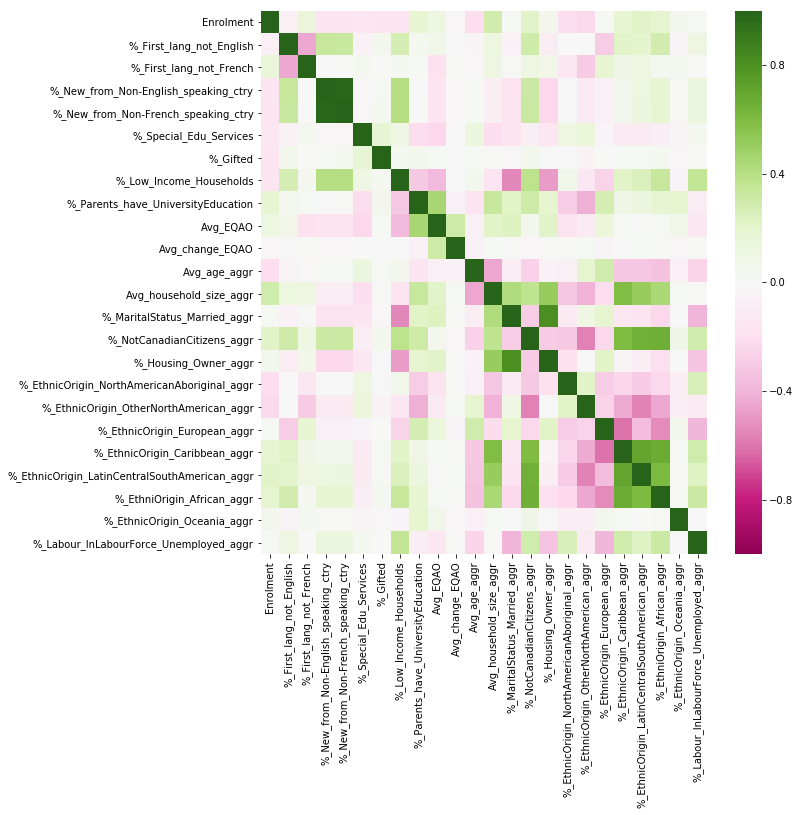

In [206]:
#Plotting a correlation matrix
correl = df_ml.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correl, 
        xticklabels=correl.columns,
        yticklabels=correl.columns, vmin=-1, vmax=1,cmap="PiYG")

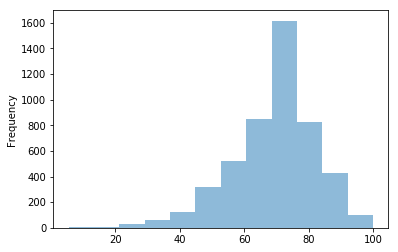

In [207]:
df_ml['Avg_EQAO'].plot.hist(bins=12, alpha=0.5)


In [229]:
#creating bins
bins = [0,60,80, 100]
labels=['Poor','Average','Excellent']
df_ml['EQAO_Class']= pd.cut(df_ml['Avg_EQAO'],bins,labels=labels)
labels_sort=labels.sort()
print(df_ml.EQAO_Class.value_counts())

# if df_ml['EQAO_Class']=='Average':
#     df_ml['weights']=1
# else:
#     df_ml['weights']=3

df_ml['weights'] = np.where(df_ml['EQAO_Class']=="Average",1,3)

df_ml.head()
    
# df_ml.to_csv("df_ml.csv")

Average      2932
Poor         1024
Excellent     930
Name: EQAO_Class, dtype: int64


,Board Name,Board Type,School Type,School Level,School Language,Grade Range,Enrolment,%_First_lang_not_English,%_First_lang_not_French,%_New_from_Non-English_speaking_ctry,%_New_from_Non-French_speaking_ctry,%_Special_Edu_Services,%_Gifted,%_Low_Income_Households,%_Parents_have_UniversityEducation,Avg_EQAO,Avg_change_EQAO,Avg_age_aggr,Avg_household_size_aggr,%_MaritalStatus_Married_aggr,%_NotCanadianCitizens_aggr,%_Housing_Owner_aggr,%_EthnicOrigin_NorthAmericanAboriginal_aggr,%_EthnicOrigin_OtherNorthAmerican_aggr,%_EthnicOrigin_European_aggr,%_EthnicOrigin_Caribbean_aggr,%_EthnicOrigin_LatinCentralSouthAmerican_aggr,%_EthniOrigin_African_aggr,%_EthnicOrigin_Oceania_aggr,%_Labour_InLabourForce_Unemployed_aggr,EQAO_Class,weights
0,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,202.0,33.608842,100.0,8.734001,8.702096,19.800000,7.670225,22.7,20.5,68.867572,-0.457434,46.275,2.250,56.506849,1.929260,65.562914,7.219251,23.529412,68.181818,0.534759,0.000000,0.534759,0.0,5.514706,Average,1
1,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,182.0,33.608842,100.0,8.734001,8.702096,14.800000,7.670225,11.0,56.3,59.666667,-23.166667,46.725,2.325,60.204082,2.258065,81.944444,6.203474,25.558313,66.253102,0.496278,0.992556,0.496278,0.0,6.959707,Poor,3
2,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-3,64.0,33.608842,100.0,8.734001,8.702096,18.996518,7.670225,34.3,37.2,68.666667,22.000000,46.275,2.250,66.386555,2.347418,90.109890,4.022989,29.693487,66.283525,0.000000,0.000000,0.000000,0.0,3.380282,Average,1
3,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,177.0,33.608842,100.0,8.734001,8.702096,17.500000,7.670225,32.0,31.4,41.333333,-24.333333,44.500,2.325,62.776025,2.732240,86.250000,7.657658,20.720721,70.045045,0.900901,0.000000,0.675676,0.0,4.545455,Poor,3
4,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,152.0,33.608842,99.3,8.734001,8.702096,25.600000,7.670225,24.8,19.8,45.500000,-14.833333,46.900,2.050,56.231884,1.442308,64.676617,13.718412,31.768953,52.888087,1.624549,0.000000,0.000000,0.0,5.753425,Poor,3


In [230]:
#Start Model building
#Create Target and Predictors and split the data in test and training

X = df_ml.drop(['EQAO_Class','Avg_EQAO','weights'],axis=1)
y = df_ml['EQAO_Class']


In [231]:
# Models in scikitlearn can only handle numeric variables so use one-hot-encoding to create dummy variables


enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_ohe = enc.transform(X)

In [232]:
# Split the data into test and training with 15% reserved for testing
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y, test_size = 0.30)

In [233]:
y_test.count()

1466

In [234]:
# Compute class weights to use in balancing the data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.55964654 1.76197836 1.54891304]


# Logistic Regression

In [235]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2','l1']}]

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced',max_iter=200), param_grid, cv= 4,
                      scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train,y_train.tolist())
print ("best parameter: ", grid_search.best_params_)

best_model_log = grid_search.best_estimator_
print ("best_model: ", best_model_log)

best parameter:  {'penalty': 'l2'}
best_model:  LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [236]:
# Predicting the Test set results
y_pred_log = best_model_log.predict(X_test)
y_proba_log = best_model_log.predict_proba(X_test)
# Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix

acc_log = accuracy_score(y_test, y_pred_log)
print("The Accuracy score for Logistic Regression is: ", acc_log)

cm_log = confusion_matrix(y_test, y_pred_log)
print("The Confusion matrix for Logistic Regression is: \n" , cm_log)

The Accuracy score for Logistic Regression is:  0.6139154160982264
The Confusion matrix for Logistic Regression is: 
 [[703  86 106]
 [166  95  22]
 [174  12 102]]


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[[703  86 106]
 [166  95  22]
 [174  12 102]]


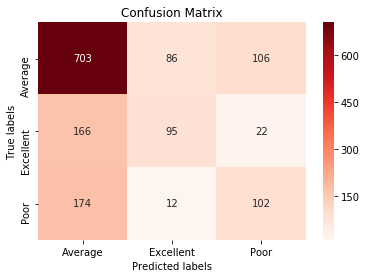

In [237]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred_log,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

In [238]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log,
                            target_names=labels_sort))

              precision    recall  f1-score   support

     Average       0.67      0.79      0.73       895
   Excellent       0.49      0.34      0.40       283
        Poor       0.44      0.35      0.39       288

    accuracy                           0.61      1466
   macro avg       0.54      0.49      0.51      1466
weighted avg       0.59      0.61      0.60      1466



## XGBoost

In [241]:
xgb_model = xgb.XGBClassifier()

cv_params = {'max_depth': [3,5], 'min_child_weight': [1,3,5],'learning_rate': [0.1,0.3,0.5],'gamma': [0.1,0.3]}

ind_params = {'n_estimators': 50, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax','num_class':3,'reg_lambda':0.1,'scale_pos_weight':1}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)


In [242]:
optimized_GBM.fit(X_train, y_train.tolist())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=50, n_jobs=1,
                                     nthread=None, num_class=3,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=0.1,
                                     scale_pos_weight=1, seed=0, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.3], 'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [

In [243]:
optimized_GBM.best_params_

{'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1}

In [244]:
y_pred_xgb = optimized_GBM.predict(X_test)

In [245]:
optimized_GBM.score(X_test, y_test)

0.6275579809004093

[[813  43  39]
 [209  65   9]
 [239   7  42]]


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


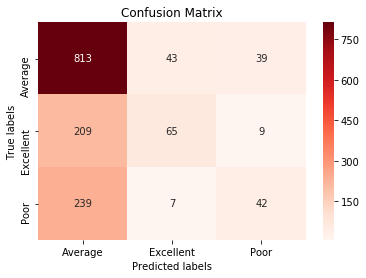

In [246]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred_xgb,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

In [247]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,
                            target_names=labels_sort))

              precision    recall  f1-score   support

     Average       0.64      0.91      0.75       895
   Excellent       0.57      0.23      0.33       283
        Poor       0.47      0.15      0.22       288

    accuracy                           0.63      1466
   macro avg       0.56      0.43      0.43      1466
weighted avg       0.59      0.63      0.57      1466

